In [57]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [9]:
import matplotlib.pyplot as plt

In [47]:
path = './input/'

In [58]:
train = pd.read_csv(path+'pfm_train.csv')
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,2,2,Manufacturing Director,3,Divorced,5993,1,Y,No,18,3,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,3,3,Manufacturing Director,3,Divorced,10502,7,Y,No,17,3,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,1,2,Laboratory Technician,3,Single,6074,1,Y,Yes,24,4,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,2,4,Manufacturing Director,4,Married,12742,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,2,1,Laboratory Technician,2,Divorced,2596,1,Y,No,15,3,1,80,2,1,2,3,1,0,0,0


In [11]:
len(train)

1100

(array([922.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 178.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

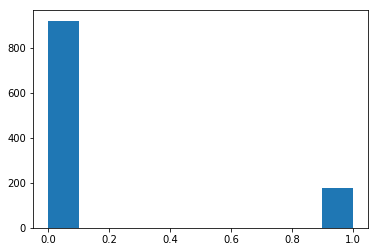

In [10]:
plt.hist(train['Attrition'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

In [7]:
test = pd.read_csv(path+'pfm_test.csv')
test.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,40,Non-Travel,Research & Development,9,4,Other,1449,3,Male,3,...,3,80,2,11,2,4,8,7,0,7
1,53,Travel_Rarely,Research & Development,7,2,Medical,1201,4,Female,3,...,2,80,1,26,6,3,7,7,4,7
2,42,Travel_Rarely,Research & Development,2,4,Other,477,1,Male,2,...,2,80,0,14,6,3,1,0,0,0
3,34,Travel_Frequently,Human Resources,11,3,Life Sciences,1289,3,Male,2,...,4,80,2,14,5,4,10,9,1,8
4,32,Travel_Rarely,Research & Development,1,1,Life Sciences,134,4,Male,3,...,4,80,0,1,2,3,1,0,0,0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [13]:
test['Attrition'] = -1

In [22]:
data = train
data = data.append(test).reset_index(drop=True)

D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [23]:
len(data)

1450

In [55]:
cat_col = [i for i in data.select_dtypes(object).columns if i not in ['Attrition']]
for i in cat_col:
#     data[i] = OneHotEncoder().fit_transform(data[i])
    data[i] = LabelEncoder().fit_transform(data[i])

In [56]:
for i in cat_col:
    plt.figure()
    plt.title(i)
    plt.hist(data[i])

In [54]:
feats = [i  for i  in data.columns if i not in ['Attrition']]
feats

['Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [40]:
train_x = data[data['Attrition'] != -1][feats]
train_y = data[data['Attrition'] != -1]['Attrition']
test_x = data[data['Attrition'] == -1][feats]

In [59]:
train_x.shape, train_y.shape, test_x.shape

((1100, 30), (1100,), (350, 30))

In [60]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [62]:
model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=70, reg_alpha=0., reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary', metric='F1',
    subsample=0.95, colsample_bytree=0.95, subsample_frew=1, 
    learning_rate=0.002, random_state=2017)
model.fit(train_x, train_y)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.95,
        importance_type='split', learning_rate=0.002, max_depth=-1,
        metric='F1', min_child_samples=20, min_child_weight=0.001,
        min_split_gain=0.0, n_estimators=1500, n_jobs=-1, num_leaves=70,
        objective='binary', random_state=2017, reg_alpha=0.0,
        reg_lambda=0.0, silent=True, subsample=0.95,
        subsample_for_bin=200000, subsample_freq=0, subsample_frew=1)

In [40]:
train_x = data[data['Attrition'] != -1][feats]
train_y = data[data['Attrition'] != -1]['Attrition']
test_x = data[data['Attrition'] == -1][feats]

In [63]:
from sklearn.model_selection import KFold
n_splits=5
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [66]:
model = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=70, reg_alpha=0., reg_lambda=0.,
    max_depth=-1, n_estimators=1500, objective='binary', metric='F1',
    subsample=0.95, colsample_bytree=0.95, subsample_frew=1, 
    learning_rate=0.002, random_state=2017)


for train_idx, val_idx in kfold.split(train_x):
    model.random_state = model.random_state+1
    train_x1 = train_x.loc[train_idx]
    train_y1 = train_y.loc[train_idx]
    test_x1 = train_x.loc[val_idx]
    test_y1 = train_y.loc[val_idx]
    model.fit(train_x1, train_y1, eval_set=[(train_x1, train_y1), (test_x1, test_y1)],
        eval_metric='auc', early_stopping_rounds=100)
    res['pred'] += model.predict_proba(test_x)[:1]
res['pred'] = res['pred']/5

[1]	training's auc: 0.890001	valid_1's auc: 0.752698
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.902683	valid_1's auc: 0.752127
[3]	training's auc: 0.900852	valid_1's auc: 0.751746
[4]	training's auc: 0.902256	valid_1's auc: 0.748444
[5]	training's auc: 0.902291	valid_1's auc: 0.745587
[6]	training's auc: 0.901526	valid_1's auc: 0.742857
[7]	training's auc: 0.900922	valid_1's auc: 0.741333
[8]	training's auc: 0.900338	valid_1's auc: 0.741968
[9]	training's auc: 0.901697	valid_1's auc: 0.743619
[10]	training's auc: 0.90525	valid_1's auc: 0.748571
[11]	training's auc: 0.907817	valid_1's auc: 0.751683
[12]	training's auc: 0.910046	valid_1's auc: 0.759937
[13]	training's auc: 0.911163	valid_1's auc: 0.75854
[14]	training's auc: 0.913529	valid_1's auc: 0.761714
[15]	training's auc: 0.913856	valid_1's auc: 0.767302
[16]	training's auc: 0.914254	valid_1's auc: 0.768698
[17]	training's auc: 0.914686	valid_1's auc: 0.770349
[18]	training's auc: 0.915441	v

NameError: name 'res' is not defined